## CLASSIFICATION USING LOGISTIC REGRESSION

In [1]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#importing dataset
hr_df=pd.read_csv('HR_comma_sep.csv')
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
print('No of samples in data is',hr_df.shape[0])

No of samples in data is 14999


##### TASK 1

##### DATA EXPLORATION AND VISUALIZATION

In [4]:
# explore the existing data types
hr_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [5]:
#A)Impact of salary on employee retention
df1=hr_df[hr_df.left==0]
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [6]:
a=hr_df.groupby(by='salary')['salary'].count()

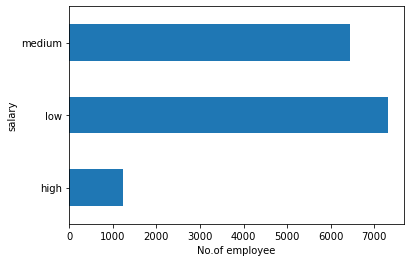

In [7]:
a.plot(x='salary',kind='barh')
plt.xlabel('No.of employee')
plt.show()

In [8]:
#B)Department wise employee retention rate
b=hr_df.groupby(by=['Department','left'])['left'].count()

#retention rate
rr=[b[0]/(b[0]+b[1]),b[2]/(b[2]+b[3]),b[4]/(b[4]+b[5]),b[6]/(b[6]+b[7]),b[8]/(b[8]+b[9]),b[10]/(b[10]+b[11]),b[12]/(b[12]+b[13]),b[14]/(b[14]+b[15]),b[16]/(b[16]+b[17]),b[18]/(b[18]+b[19])]
name=['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']   
DF=pd.DataFrame(name)
DF.columns=['DEPARTMENT']
DF['Rate']=rr
DF.sort_values(by='Rate', ascending=False)

,DEPARTMENT,Rate
4,management,0.855556
1,RandD,0.846252
6,product_mng,0.780488
0,IT,0.777506
5,marketing,0.763403
7,sales,0.755072
8,support,0.751009
9,technical,0.743750
2,accounting,0.734029
3,hr,0.709066


##### TASK 2

#####  DATA PREPROCESSING

In [9]:
#MISSING VALUES
hr_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

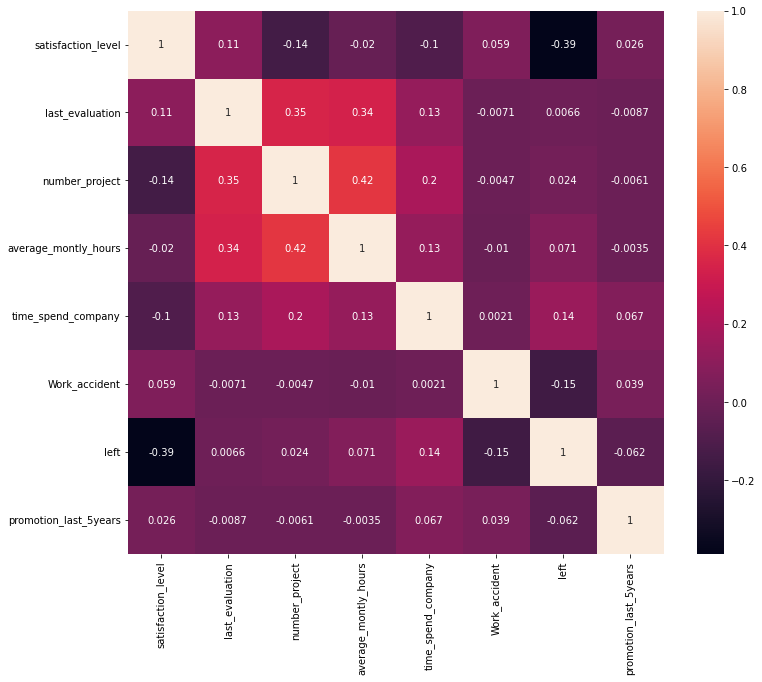

In [10]:
#detecting correlation
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(hr_df.corr(),annot=True);
plt.show()

##### DATA PREPARATION

In [11]:
#Encoding salary & department variable to numerical variable
surviver_encoder = preprocessing.LabelEncoder()

# Encoding of the salary
surviver_encoder.fit(hr_df.salary)
print(surviver_encoder.classes_)
hr_df.salary = surviver_encoder.transform(hr_df.salary)

#Encoding of the department
surviver_encoder.fit(hr_df.Department)
print(surviver_encoder.classes_)
hr_df.Department = surviver_encoder.transform(hr_df.Department)

['high' 'low' 'medium']
['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


In [12]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


##### TASK 3

##### MODELLING-LOGISTIC REGRESSION

##### !)Preparation of training and testing data

In [13]:
#Creating test and training datasets
hr_train, hr_test = train_test_split(hr_df,train_size = 0.7)

print('Size of training dataset: ', hr_train.shape)
print('Size of test dataset: ', hr_test.shape)

Size of training dataset:  (10499, 10)
Size of test dataset:  (4500, 10)


In [14]:
X_train = hr_train.drop(columns='left', axis =1)
Y_train = hr_train['left']
X_test = hr_test.drop(columns='left', axis =1)
Y_test = hr_test['left']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((10499, 9), (10499,), (4500, 9), (4500,))

##### 2)Training the model & Predicting the outcome

In [15]:
# Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test)
Y_pred

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [16]:
#Calculating the accuracy of the training dataset
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print('Accuracy of training dataset:',acc_log)

Accuracy of training dataset: 76.65


In [17]:
#Calculating the accuracy of the testing dataset
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
print('Accuracy of testing dataset:',acc_log)

Accuracy of testing dataset: 76.73


In [18]:
# indicates the value of the slope of each parameter 
coeff_df = pd.DataFrame(hr_train.columns.delete(6))
coeff_df.columns = ['Features']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation')

,Features,Correlation
0,satisfaction_level,-4.054977
5,Work_accident,-1.439581
6,promotion_last_5years,-0.942380
2,number_project,-0.304106
8,salary,-0.038507
3,average_montly_hours,0.004473
7,Department,0.031354
4,time_spend_company,0.224242
1,last_evaluation,0.759946


In [19]:
print('The satisfaction level is the most important factor when people are leaving company')

The satisfaction level is the most important factor when people are leaving company


##### TASK 4

##### MODEL EVALUATION

##### 1)CONFUSION MATRIX

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[3177,  243],
       [ 804,  276]], dtype=int64)

In [21]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred, average='weighted'))
print('f1-score:', f1_score(Y_test, Y_pred, average='weighted'))
print('precision:', precision_score(Y_test, Y_pred))

accuracy: 0.7673333333333333
recall: 0.7673333333333333
f1-score: 0.7353365817154165
precision: 0.5317919075144508


##### 2)AUC

In [22]:
Y_pred=logreg.predict(X_test)

In [23]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(Y_test,Y_pred)
print('AUC:',auc)

AUC: 0.5922514619883041


In [24]:
#END